https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-al.csv

In [361]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import timedelta
import plotly.express as px
from datetime import datetime
from datetime import date
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

### Leitura dos dados

In [362]:
#https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-al.csv
df = pd.read_csv("https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-al.csv",sep=';',encoding = "ISO-8859-1")
df.rename(columns = {"ÿid":"id"}, inplace = True)
df.head()

,id,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,...,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,excluido,validado,idade,dataEncerramento,evolucaoCaso,classificacaoFinal
0,ZhUa1ql0lL,2020-05-31T15:01:33.806Z,2020-05-14T03:00:00.000Z,1990-01-01T02:00:00.000Z,Outros,Não,NaN,NaN,Concluído,2020-05-22T03:00:00.000Z,...,Alagoas,27.0,Maragogi,2704500.0,undefined,undefined,31.0,2020-06-18T03:00:00.000Z,Cura,Descartado
1,WTILjC3jL8,2020-06-03T11:23:35.325Z,2020-05-29T03:00:00.000Z,1985-12-22T02:00:00.000Z,"Dor de Garganta, Tosse",Não,NaN,NaN,Concluído,2020-06-01T03:00:00.000Z,...,São Paulo,35.0,São Paulo,3550308.0,undefined,undefined,35.0,2020-06-18T03:00:00.000Z,Cura,Confirmado Laboratorial
2,sdMUUT2oiS,2020-06-18T03:52:09.023Z,2020-06-14T03:00:00.000Z,1951-06-12T03:00:00.000Z,Tosse,Não,NaN,NaN,Solicitado,NaN,...,Alagoas,27.0,Maceió,2704302.0,undefined,undefined,70.0,NaN,NaN,NaN
3,4O4TJ5zi8T,2020-06-18T11:54:11.332Z,2020-06-10T03:00:00.000Z,1946-03-22T03:00:00.000Z,"Febre, Tosse, Dispneia",Não,NaN,"Diabetes, Doenças cardíacas crônicas",NaN,NaN,...,Alagoas,27.0,Maceió,2704302.0,undefined,undefined,75.0,NaN,NaN,NaN
4,M1DH1j7Os5,2020-05-26T03:00:00.000Z,2020-05-17T03:00:00.000Z,2000-01-09T03:00:00.000Z,"Febre, Tosse, Outros, Dor de Garganta",Não,NaN,NaN,Concluído,2020-05-25T03:00:00.000Z,...,Alagoas,27.0,Maribondo,2704807.0,undefined,undefined,21.0,NaN,NaN,Descartado


In [363]:
df.shape

(785659, 29)

### Remoção de colunas 

In [364]:
#Sem dados repetidos
df[df.duplicated()]

,id,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,...,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,excluido,validado,idade,dataEncerramento,evolucaoCaso,classificacaoFinal


In [365]:
#número de nulls
df.isnull().sum()

id                               0
dataNotificacao                471
dataInicioSintomas            1736
dataNascimento                 776
sintomas                       908
profissionalSaude             2733
cbo                         749098
condicoes                   715891
estadoTeste                  45094
dataTeste                   213739
tipoTeste                   174953
resultadoTeste              252661
paisOrigem                  785520
sexo                           754
estado                        1150
estadoIBGE                    1150
municipio                       82
municipioIBGE                 1202
origem                           0
estadoNotificacao                1
estadoNotificacaoIBGE            1
municipioNotificacao          1108
municipioNotificacaoIBGE      1133
excluido                         0
validado                         0
idade                          776
dataEncerramento            437905
evolucaoCaso                385759
classificacaoFinal  

In [366]:
#Apagando colunas que tem 90% de NAN.
df = df.loc[:, df.isnull().mean() < .9]
df.isnull().sum(),df.shape

(id                               0
 dataNotificacao                471
 dataInicioSintomas            1736
 dataNascimento                 776
 sintomas                       908
 profissionalSaude             2733
 estadoTeste                  45094
 dataTeste                   213739
 tipoTeste                   174953
 resultadoTeste              252661
 sexo                           754
 estado                        1150
 estadoIBGE                    1150
 municipio                       82
 municipioIBGE                 1202
 origem                           0
 estadoNotificacao                1
 estadoNotificacaoIBGE            1
 municipioNotificacao          1108
 municipioNotificacaoIBGE      1133
 excluido                         0
 validado                         0
 idade                          776
 dataEncerramento            437905
 evolucaoCaso                385759
 classificacaoFinal          425353
 dtype: int64,
 (785659, 26))

In [367]:
#Apagando colunas com valores únicos.
for i in df:
    if df[i].nunique() <=1:
        print(i)
        del df[i] 


origem
excluido
validado


### Definições de tipos

In [368]:
df.head()

,id,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,estadoTeste,dataTeste,tipoTeste,resultadoTeste,...,municipio,municipioIBGE,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,idade,dataEncerramento,evolucaoCaso,classificacaoFinal
0,ZhUa1ql0lL,2020-05-31T15:01:33.806Z,2020-05-14T03:00:00.000Z,1990-01-01T02:00:00.000Z,Outros,Não,Concluído,2020-05-22T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Negativo,...,Maragogi,2704500.0,Alagoas,27.0,Maragogi,2704500.0,31.0,2020-06-18T03:00:00.000Z,Cura,Descartado
1,WTILjC3jL8,2020-06-03T11:23:35.325Z,2020-05-29T03:00:00.000Z,1985-12-22T02:00:00.000Z,"Dor de Garganta, Tosse",Não,Concluído,2020-06-01T03:00:00.000Z,RT-PCR,Positivo,...,Maceió,2704302.0,São Paulo,35.0,São Paulo,3550308.0,35.0,2020-06-18T03:00:00.000Z,Cura,Confirmado Laboratorial
2,sdMUUT2oiS,2020-06-18T03:52:09.023Z,2020-06-14T03:00:00.000Z,1951-06-12T03:00:00.000Z,Tosse,Não,Solicitado,NaN,NaN,NaN,...,Maceió,2704302.0,Alagoas,27.0,Maceió,2704302.0,70.0,NaN,NaN,NaN
3,4O4TJ5zi8T,2020-06-18T11:54:11.332Z,2020-06-10T03:00:00.000Z,1946-03-22T03:00:00.000Z,"Febre, Tosse, Dispneia",Não,NaN,NaN,NaN,NaN,...,Maceió,2704302.0,Alagoas,27.0,Maceió,2704302.0,75.0,NaN,NaN,NaN
4,M1DH1j7Os5,2020-05-26T03:00:00.000Z,2020-05-17T03:00:00.000Z,2000-01-09T03:00:00.000Z,"Febre, Tosse, Outros, Dor de Garganta",Não,Concluído,2020-05-25T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Negativo,...,Maribondo,2704807.0,Alagoas,27.0,Maribondo,2704807.0,21.0,NaN,NaN,Descartado


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785659 entries, 0 to 785658
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        785659 non-null  object 
 1   dataNotificacao           785188 non-null  object 
 2   dataInicioSintomas        783923 non-null  object 
 3   dataNascimento            784883 non-null  object 
 4   sintomas                  784751 non-null  object 
 5   profissionalSaude         782926 non-null  object 
 6   estadoTeste               740565 non-null  object 
 7   dataTeste                 571920 non-null  object 
 8   tipoTeste                 610706 non-null  object 
 9   resultadoTeste            532998 non-null  object 
 10  sexo                      784905 non-null  object 
 11  estado                    784509 non-null  object 
 12  estadoIBGE                784509 non-null  float64
 13  municipio                 785577 non-null  o

In [370]:
#estadoIBGE,municipioIBGE,estadoNotificacaoIBGE,municipioNotificacaoIBGE aparentam ser ids para cidades e estados
df.describe()

,estadoIBGE,municipioIBGE,estadoNotificacaoIBGE,municipioNotificacaoIBGE,idade
count,784509.000000,7.844570e+05,785658.000000,7.845260e+05,784883.000000
mean,27.033853,2.707679e+06,27.150378,2.719420e+06,37.299818
std,0.845159,8.509841e+04,1.499644,1.512132e+05,18.139499
min,11.000000,1.100049e+06,11.000000,1.100023e+06,0.000000
25%,27.000000,2.702405e+06,27.000000,2.702355e+06,25.000000
50%,27.000000,2.704302e+06,27.000000,2.704302e+06,36.000000
75%,27.000000,2.705705e+06,27.000000,2.705507e+06,49.000000
max,53.000000,5.300108e+06,53.000000,5.300108e+06,647.000000


id é único.<br>
Colunas tipo data para datatime e colocando NaT para datas inválidas.<br>
Outroas colunas para categorico.<br>

In [371]:
#id é único
for i in df.columns[1:]: 
    #Mudando tipo das datas para datatime e colocando NaT para datas inválidas.
    if "data" in i:
        df[i] = pd.to_datetime(df[i], errors = 'coerce')
    #Outros tipos para categorico.
    elif i != "idade":
        df[i] = df[i].astype('category')

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785659 entries, 0 to 785658
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   id                        785659 non-null  object             
 1   dataNotificacao           785188 non-null  datetime64[ns, UTC]
 2   dataInicioSintomas        783923 non-null  datetime64[ns, UTC]
 3   dataNascimento            784859 non-null  datetime64[ns, UTC]
 4   sintomas                  784751 non-null  category           
 5   profissionalSaude         782926 non-null  category           
 6   estadoTeste               740565 non-null  category           
 7   dataTeste                 571920 non-null  datetime64[ns, UTC]
 8   tipoTeste                 610706 non-null  category           
 9   resultadoTeste            532998 non-null  category           
 10  sexo                      784905 non-null  category           
 11  

### Tratamento de Dados ausentes

In [373]:
antes = df.shape[0]

In [374]:
df.isnull().sum()

id                               0
dataNotificacao                471
dataInicioSintomas            1736
dataNascimento                 800
sintomas                       908
profissionalSaude             2733
estadoTeste                  45094
dataTeste                   213739
tipoTeste                   174953
resultadoTeste              252661
sexo                           754
estado                        1150
estadoIBGE                    1150
municipio                       82
municipioIBGE                 1202
estadoNotificacao                1
estadoNotificacaoIBGE            1
municipioNotificacao          1108
municipioNotificacaoIBGE      1133
idade                          776
dataEncerramento            437905
evolucaoCaso                385759
classificacaoFinal          425353
dtype: int64

dataNotificacao

In [375]:
df = df[df['dataNotificacao'].notnull()]

dataInicioSintomas e dataEncerramento

In [376]:
df['dataInicioSintomas'].isnull().sum(),df['dataEncerramento'].isnull().sum()

(1697, 437620)

In [377]:
#datas sem inicio dos sintomas e sem o fim dos sintomas.

df= df[~((df['dataInicioSintomas'].isnull()) & (df['dataEncerramento'].isnull()))]
#drop nas linhas sme data de inicio
df = df[~(df['dataInicioSintomas'].isnull())]

In [378]:
#verificando se tem alguma anomalia.
(df['dataEncerramento'] - df['dataInicioSintomas']).dt.days.min()

-21970.0

In [379]:
#Retirando intervalos negativos.
df = df.drop(df[(df['dataEncerramento'] - df['dataInicioSintomas']).dt.days<0].index)

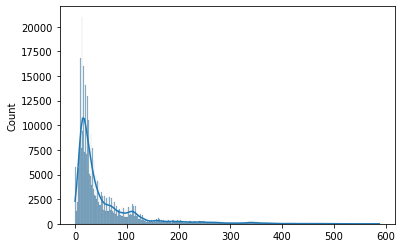

In [380]:
#distribuição do inicio dos sintomas até a notificação dos sintomas.
sns.histplot((df['dataEncerramento'] - df['dataInicioSintomas']).dt.days, kde=True);

In [381]:
mediana = (df['dataEncerramento'] - df['dataInicioSintomas']).dt.days.median()
df['dataEncerramento'].fillna(df['dataInicioSintomas'] + timedelta(days=mediana),inplace = True)

dataNascimento

In [382]:
#pouco caso nulo, então apenas vou excluir
df['dataNascimento'].isnull().sum()

787

In [383]:
df = df[df['dataNascimento'].notnull()]

sintomas

In [384]:
df['sintomas'].isnull().sum()

277

In [385]:
df['sintomas'].nunique()

14322

In [386]:
df['sintomas'].mode()

0    Outros
Name: sintomas, dtype: category
Categories (14443, object): ['Assintomático', 'Assintomático, Coriza', 'Assintomático, Coriza, Distúrbios Gustativos,..., 'Assintomático, Coriza, Distúrbios Olfativos', ..., 'Tosse,Febre,Dispneia,Dor de Garganta', 'Tosse,Febre,Dor de Garganta', 'Tosse,Outros', 'Tosse,Outros,']

In [387]:
df[df['sintomas']=="Outros"]['resultadoTeste'].value_counts(dropna=False)

Negativo                         24724
Positivo                         19384
NaN                              17537
Inconclusivo ou Indeterminado       26
Name: resultadoTeste, dtype: int64

In [388]:
#Subistituindo valores faltantes pela moda.
df['sintomas'] = df['sintomas'].fillna(df['sintomas'].mode())

profissionalSaude

In [389]:
df['profissionalSaude'].unique()

['Não', 'Sim', NaN]
Categories (2, object): ['Não', 'Sim']

In [390]:
df['profissionalSaude'].isnull().sum()

1379

<AxesSubplot:xlabel='profissionalSaude', ylabel='Count'>

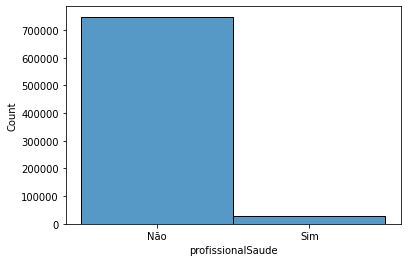

In [391]:
sns.histplot(df['profissionalSaude'])

In [392]:
df = df[df['profissionalSaude'].notnull()]

municipio

In [393]:
df = df[df['municipio'].notnull()]

estadoNotificacao

In [394]:
df = df[df['estadoNotificacao']=="Alagoas"]

municipioIBGE

In [395]:
df = df[df['municipioIBGE'].notnull()]

classificacaoFinal

In [396]:
df['classificacaoFinal'].unique()

['Descartado', NaN, 'Confirmado Laboratorial', 'Confirmado Clínico-Epidemiológico', 'Síndrome Gripal Não Especificada', 'Confirmado Clínico-Imagem', 'Confirmado por Critério Clínico']
Categories (7, object): ['Confirmado Clínico-Epidemiológico', 'Confirmado Clínico-Imagem', 'Confirmado Laboratorial', 'Confirmado por Critério Clínico', 'Confirmação Laboratorial', 'Descartado', 'Síndrome Gripal Não Especificada']

In [397]:
df['classificacaoFinal'].value_counts()

Confirmado Laboratorial              147460
Descartado                            93814
Síndrome Gripal Não Especificada      81616
Confirmado por Critério Clínico       15867
Confirmado Clínico-Epidemiológico     11790
Confirmado Clínico-Imagem               480
Confirmação Laboratorial                  0
Name: classificacaoFinal, dtype: int64

In [398]:
df['classificacaoFinal'].isnull().sum()

411655

In [399]:
df['classificacaoFinal'] = df['classificacaoFinal'].astype('string')
#tenho acompanhamento, mas não tenho confirmação de teste
df.loc[(df['evolucaoCaso'].notnull()) & ((df['classificacaoFinal'].isnull())),['classificacaoFinal']] = "Sem Confirmação"
#tenho resultado, mas não tenho confirmação de teste
df.loc[(df['resultadoTeste'].notnull()) & ((df['classificacaoFinal'].isnull())),['classificacaoFinal']] = "Sem Confirmação"
#tenho queo teste foi feito e que tipo de teste, mas não tenho confirmação de teste
df.loc[(df['tipoTeste'].notnull()) & ((df['classificacaoFinal'].isnull())),['classificacaoFinal']] = "Sem Confirmação"
#tenho a data do teste, mas não tenho confirmação de teste
df.loc[(df['dataTeste'].notnull()) & ((df['classificacaoFinal'].isnull())),['classificacaoFinal']] = "Sem Confirmação"

df['classificacaoFinal'] = df['classificacaoFinal'].astype('category')

In [400]:
df['classificacaoFinal'].isnull().sum()

85798

dataTeste

In [401]:
#teste podem ser feito para dectar a partir do setimo dia de sintoma.
df.loc[(df['resultadoTeste'].notnull()) & (df['dataTeste'].isnull()),['dataTeste']] =  df['dataInicioSintomas'] + timedelta(days=7)

In [402]:
df['dataTeste'].isnull().sum()

198795

resultadoTeste

In [403]:
df['resultadoTeste'].unique()

['Negativo', NaN, 'Positivo', 'Inconclusivo ou Indeterminado']
Categories (3, object): ['Inconclusivo ou Indeterminado', 'Negativo', 'Positivo']

In [404]:
df['resultadoTeste'].value_counts()

Negativo                         302514
Positivo                         214373
Inconclusivo ou Indeterminado       804
Name: resultadoTeste, dtype: int64

In [405]:
df['resultadoTeste'].isnull().sum()

244991

In [406]:
#preencher todo o resto com Inconclusivo ou Indeterminado
df.loc[(df['resultadoTeste'].isnull()),['resultadoTeste']] = "Inconclusivo ou Indeterminado"

estadoTeste

In [407]:
df['estadoTeste'].unique()

['Concluído', 'Solicitado', NaN, 'Coletado', 'Exame Não Solicitado']
Categories (4, object): ['Coletado', 'Concluído', 'Exame Não Solicitado', 'Solicitado']

In [408]:
df['estadoTeste'].value_counts()

Concluído               528800
Solicitado               72084
Exame Não Solicitado     71112
Coletado                 47648
Name: estadoTeste, dtype: int64

In [409]:
df['estadoTeste'].isnull().sum()

43038

evolucaoCaso


In [410]:
df['evolucaoCaso'].isnull().sum()

374548

In [411]:
df['evolucaoCaso'].value_counts()

Cura                        299670
Cancelado                    58867
Em tratamento domiciliar     12625
Ignorado                     12252
Óbito                         4032
Internado                      586
Internado em UTI               102
Name: evolucaoCaso, dtype: int64

In [412]:
df['evolucaoCaso'] = df['evolucaoCaso'].astype('string')
df.loc[(df['evolucaoCaso'].isnull()),['evolucaoCaso']] = "Sem Acompanhamento"
df['evolucaoCaso'] = df['evolucaoCaso'].astype('category')

In [413]:
df.dropna(inplace = True)

In [414]:
#Porcetagem de linhas que ficaram no dataset.
100 - ((antes - df.shape[0])/antes)*100

70.34069488162167

In [415]:
#linhas antes e depois
antes, df.shape[0]

(785659, 552638)

### Normalização e Discretização

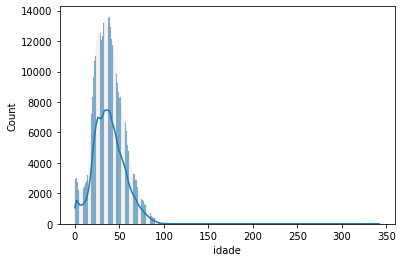

In [416]:
sns.histplot(df['idade'],kde = True);

In [417]:
df['idade'].describe()

count    552638.000000
mean         38.269207
std          17.308353
min           0.000000
25%          26.000000
50%          37.000000
75%          49.000000
max         342.000000
Name: idade, dtype: float64

In [418]:
#idade descretizada
idades = ['Criança', 'Adolecente', 'Adulto', 'Idoso']
corte = [0,12,18,60,df['idade'].max()]
df['idade_descri'] = pd.cut(df['idade'],bins=corte, labels =idades)
df.head()

,id,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,estadoTeste,dataTeste,tipoTeste,resultadoTeste,...,municipioIBGE,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,idade,dataEncerramento,evolucaoCaso,classificacaoFinal,idade_descri
0,ZhUa1ql0lL,2020-05-31 15:01:33.806000+00:00,2020-05-14 03:00:00+00:00,1990-01-01 02:00:00+00:00,Outros,Não,Concluído,2020-05-22 03:00:00+00:00,TESTE RÁPIDO - ANTICORPO,Negativo,...,2704500.0,Alagoas,27.0,Maragogi,2704500.0,31.0,2020-06-18 03:00:00+00:00,Cura,Descartado,Adulto
4,M1DH1j7Os5,2020-05-26 03:00:00+00:00,2020-05-17 03:00:00+00:00,2000-01-09 03:00:00+00:00,"Febre, Tosse, Outros, Dor de Garganta",Não,Concluído,2020-05-25 03:00:00+00:00,TESTE RÁPIDO - ANTICORPO,Negativo,...,2704807.0,Alagoas,27.0,Maribondo,2704807.0,21.0,2020-06-15 03:00:00+00:00,Sem Acompanhamento,Descartado,Adulto
5,KW5li9MeeU,2020-06-09 03:00:00+00:00,2020-05-22 03:00:00+00:00,1996-04-21 03:00:00+00:00,"Febre, Outros",Não,Concluído,2020-06-09 03:00:00+00:00,TESTE RÁPIDO - ANTÍGENO,Positivo,...,2707305.0,Alagoas,27.0,Maribondo,2704807.0,25.0,2020-06-20 03:00:00+00:00,Sem Acompanhamento,Sem Confirmação,Adulto
6,MTEIyWoaFz,2020-06-17 20:17:16.221000+00:00,2020-06-09 03:00:00+00:00,1996-05-17 03:00:00+00:00,"Tosse, Dor de Garganta",Não,Concluído,2020-06-17 03:00:00+00:00,TESTE RÁPIDO - ANTÍGENO,Negativo,...,2702900.0,Alagoas,27.0,Girau do Ponciano,2702900.0,25.0,2020-06-17 03:00:00+00:00,Cura,Confirmado Laboratorial,Adulto
10,O7LynDz1vO,2020-06-17 20:28:58.208000+00:00,2020-06-06 03:00:00+00:00,1942-04-12 03:00:00+00:00,Tosse,Não,Concluído,2020-06-17 03:00:00+00:00,TESTE RÁPIDO - ANTÍGENO,Negativo,...,2702900.0,Alagoas,27.0,Girau do Ponciano,2702900.0,79.0,2020-06-17 03:00:00+00:00,Cura,Confirmado Laboratorial,Idoso


In [419]:
#Usando a idade para normalização zscore
df['idade_zscore'] = stats.zscore(df['idade'])
df.head()

,id,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,estadoTeste,dataTeste,tipoTeste,resultadoTeste,...,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,idade,dataEncerramento,evolucaoCaso,classificacaoFinal,idade_descri,idade_zscore
0,ZhUa1ql0lL,2020-05-31 15:01:33.806000+00:00,2020-05-14 03:00:00+00:00,1990-01-01 02:00:00+00:00,Outros,Não,Concluído,2020-05-22 03:00:00+00:00,TESTE RÁPIDO - ANTICORPO,Negativo,...,Alagoas,27.0,Maragogi,2704500.0,31.0,2020-06-18 03:00:00+00:00,Cura,Descartado,Adulto,-0.419983
4,M1DH1j7Os5,2020-05-26 03:00:00+00:00,2020-05-17 03:00:00+00:00,2000-01-09 03:00:00+00:00,"Febre, Tosse, Outros, Dor de Garganta",Não,Concluído,2020-05-25 03:00:00+00:00,TESTE RÁPIDO - ANTICORPO,Negativo,...,Alagoas,27.0,Maribondo,2704807.0,21.0,2020-06-15 03:00:00+00:00,Sem Acompanhamento,Descartado,Adulto,-0.997739
5,KW5li9MeeU,2020-06-09 03:00:00+00:00,2020-05-22 03:00:00+00:00,1996-04-21 03:00:00+00:00,"Febre, Outros",Não,Concluído,2020-06-09 03:00:00+00:00,TESTE RÁPIDO - ANTÍGENO,Positivo,...,Alagoas,27.0,Maribondo,2704807.0,25.0,2020-06-20 03:00:00+00:00,Sem Acompanhamento,Sem Confirmação,Adulto,-0.766637
6,MTEIyWoaFz,2020-06-17 20:17:16.221000+00:00,2020-06-09 03:00:00+00:00,1996-05-17 03:00:00+00:00,"Tosse, Dor de Garganta",Não,Concluído,2020-06-17 03:00:00+00:00,TESTE RÁPIDO - ANTÍGENO,Negativo,...,Alagoas,27.0,Girau do Ponciano,2702900.0,25.0,2020-06-17 03:00:00+00:00,Cura,Confirmado Laboratorial,Adulto,-0.766637
10,O7LynDz1vO,2020-06-17 20:28:58.208000+00:00,2020-06-06 03:00:00+00:00,1942-04-12 03:00:00+00:00,Tosse,Não,Concluído,2020-06-17 03:00:00+00:00,TESTE RÁPIDO - ANTÍGENO,Negativo,...,Alagoas,27.0,Girau do Ponciano,2702900.0,79.0,2020-06-17 03:00:00+00:00,Cura,Confirmado Laboratorial,Idoso,2.353247


### Limpeza de Dados

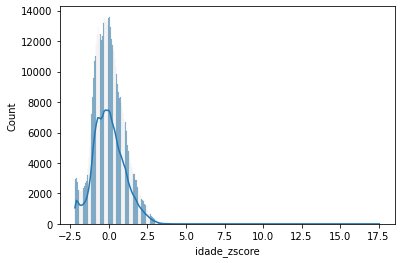

In [420]:
#assumindo 4 como corte da idade
sns.histplot(df['idade_zscore'], kde = True);

In [421]:
df = df[(df['idade_zscore']<4)]

In [422]:
#26/2/2020 primeiro caso
#https://www.unasus.gov.br/noticia/coronavirus-brasil-confirma-primeiro-caso-da-doenca
df = df[~(df['dataNotificacao'] <pd.to_datetime('2020-02-26', utc=True))]

In [423]:
#retirando datas que passem de encerramento que passem do dia atual.
df = df[df['dataEncerramento']<pd.to_datetime(date.today(), utc=True)]

### Apresentação dos dados

**Principal Faixa etária com positiva para Covid em Alagoas.**

In [424]:
df[df['resultadoTeste']=='Positivo']['idade_descri'].value_counts()

Adulto        169519
Idoso          27699
Criança         8382
Adolecente      8034
Name: idade_descri, dtype: int64

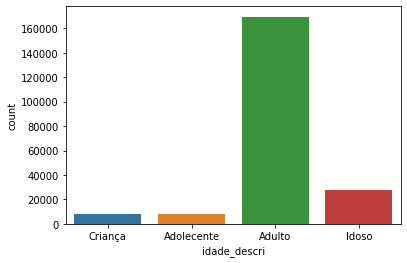

In [425]:
sns.countplot(x=df[df['resultadoTeste']=='Positivo']['idade_descri']);

**Principal faixa etária de óbitos por Covid em Alagoas.**

In [426]:
df[(df['evolucaoCaso']=='Óbito') & (df['resultadoTeste']=='Positivo')]['idade_descri'].value_counts()

Idoso         2190
Adulto        1150
Criança         25
Adolecente       9
Name: idade_descri, dtype: int64

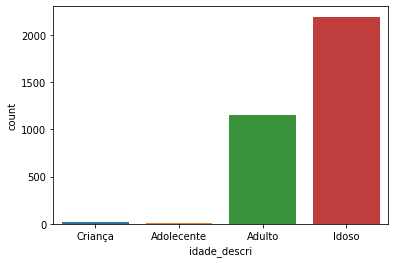

In [427]:
sns.countplot(x=df[(df['evolucaoCaso']=='Óbito') & (df['resultadoTeste']=='Positivo')]['idade_descri']);

**Óbitos por município.**

In [428]:
df[df['evolucaoCaso']=='Óbito'].groupby('municipioNotificacao').count()['id'].nlargest(5)

municipioNotificacao
Maceió                1867
Arapiraca              509
Santana do Ipanema     158
Coruripe               104
Delmiro Gouveia        104
Name: id, dtype: int64

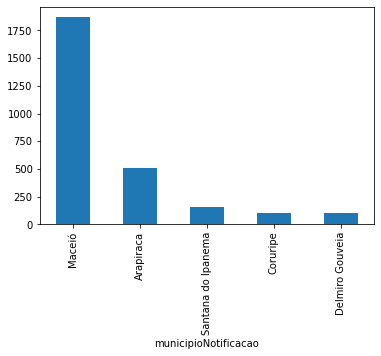

In [429]:
df[df['evolucaoCaso']=='Óbito'].groupby('municipioNotificacao').count()['id'].nlargest(5).plot.bar();

**Resutaldos positivos para covid por município.** 

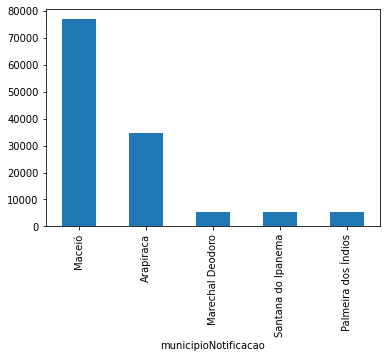

In [430]:
df[df['resultadoTeste']=='Positivo'].groupby('municipioNotificacao').count()['id'].nlargest(5).plot.bar();

Taxa de mortalidade

In [461]:
#Maiores taxa da mortalidade
#Imagem no feed do github caso não carregue no git
fig = px.bar(df, x=(df[(df['evolucaoCaso']=='Óbito')].groupby('municipioNotificacao').count()*100/df[df['resultadoTeste']=='Positivo'].groupby('municipioNotificacao').count()).dropna()['id'], 
             y=(df[(df['evolucaoCaso']=='Óbito')].groupby('municipioNotificacao').count()*100/df[df['resultadoTeste']=='Positivo'].groupby('municipioNotificacao').count()).dropna()['id'].index, 
             color=(df[(df['evolucaoCaso']=='Óbito')].groupby('municipioNotificacao').count()*100/df[df['resultadoTeste']=='Positivo'].groupby('municipioNotificacao').count()).dropna()['id'],
                 title="Taxa de Mortalidade",width=1000, height=2000) 

fig.update_layout(
    xaxis_title="Taxa de Mortalidade %",
    yaxis_title="Municípios"

    )
fig.show()


**Taxa de testes realizado e casos positivos.**

<AxesSubplot:xlabel='resultadoTeste', ylabel='count'>

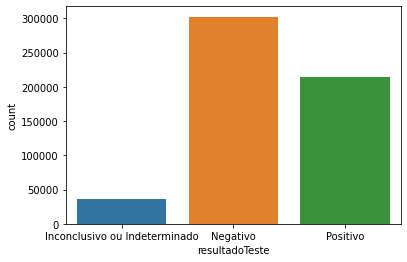

In [432]:
sns.countplot(x = df['resultadoTeste'])

Para cada teste feito com resultado positivo, temos que a por volta de 40% de chance de ser positivo. 

Para cada 2.5 testes para covid feito 1 vai ser positivo.

Basicamente só é testado quem está com Covid.

In [433]:
round((df[df['resultadoTeste']=='Positivo'].shape[0]/df.shape[0])*100,2)

38.79

**Principais Sintomas**

Porcetagem da ocorrência dos Sintomas em casos Positivos.

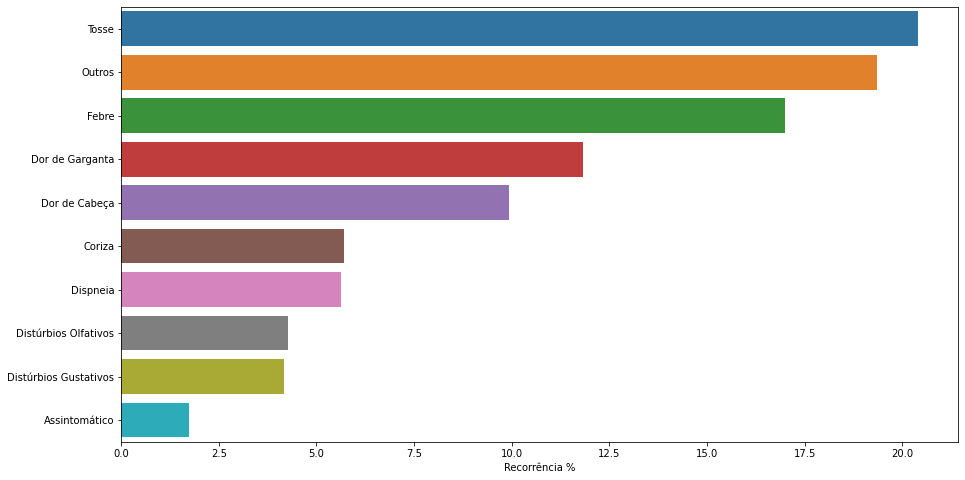

In [434]:
#Separando os sintomas mais presentes em casos positivos
dic={}
for i in df[df['resultadoTeste']=='Positivo']['sintomas'].str.split(','):
    for j in i:
        if j.strip() in dic.keys():
            dic[j.strip()]=dic[j.strip()]+1
        else:
            dic[j.strip()] = 1
        
dfAux = pd.DataFrame.from_dict(dic, orient='index',columns=["Recorrência"])
dfAux = dfAux.sort_values(by=["Recorrência"], ascending=False)
plt.figure(figsize=(15,8))
ax = sns.barplot(x=dfAux["Recorrência"]*100/dfAux["Recorrência"].sum(), y=dfAux.index);
ax.set(xlabel="Recorrência %")
plt.show()

**Principais sintomas em caso de Óbito**

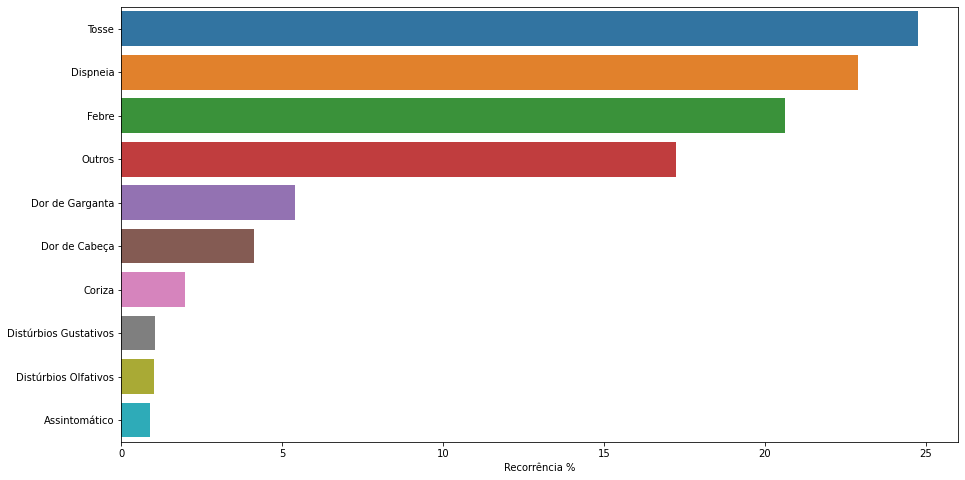

In [435]:

#Separando os sintomas mais presentes em casos positivos
dic={}
for i in df[df['evolucaoCaso']=='Óbito']['sintomas'].str.split(','):
    for j in i:
        if j.strip() in dic.keys():
            dic[j.strip()]=dic[j.strip()]+1
        else:
            dic[j.strip()] = 1
        
dfAux = pd.DataFrame.from_dict(dic, orient='index',columns=["Recorrência"])
dfAux = dfAux.sort_values(by=["Recorrência"], ascending=False)
plt.figure(figsize=(15,8))
ax = sns.barplot(x=dfAux["Recorrência"]*100/dfAux["Recorrência"].sum(), y=dfAux.index);
ax.set(xlabel="Recorrência %")
plt.show()

Mortalidade por sexo

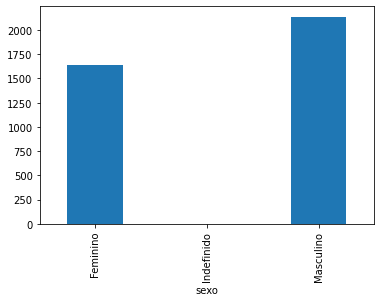

In [456]:
df[df['evolucaoCaso']=='Óbito'].groupby('sexo').count()['id'].plot.bar();